In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [125]:
df = pd.read_csv('imigrantes_canada.csv')
df.head()

,País,Continente,Região,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afeganistão,Ásia,Sul da Ásia,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albânia,Europa,Sul da Europa,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
2,Argélia,África,Norte da África,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,Samoa Americana,Oceânia,Polinésia,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europa,Sul da Europa,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [126]:
df.set_index('País', inplace=True)

In [ ]:
anos = list(map(str, range(1980, 2014)))

In [ ]:
Brasil = df.loc['Brasil', anos]

In [ ]:
Brasil_dict = {'Ano' : Brasil.index.to_list(),
               'Imigrantes' : Brasil.values.tolist()}
dados_brasil = pd.DataFrame(Brasil_dict) #DATAFRAME

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(dados_brasil['Ano'], dados_brasil['Imigrantes'], marker='o', color='blue', linewidth=2)
ax.set_title('Número de Imigrantes Brasileiros no Canadá (1980-2013)')
ax.set_xlabel('Ano')
ax.set_ylabel('Número de Imigrantes')
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
plt.show()

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15,6))
axs[0].plot(dados_brasil['Ano'], dados_brasil['Imigrantes'], marker='o', color='blue', linewidth=2)
axs[0].set_title('Número de Imigrantes Brasileiros no Canadá (1980-2013)')
axs[0].set_xlabel('Ano')
axs[0].set_ylabel('Número de Imigrantes')
axs[0].xaxis.set_major_locator(plt.MultipleLocator(5))
axs[0].grid()

axs[1].boxplot(dados_brasil['Imigrantes'], vert=True)
axs[1].set_title('Distribuição dos Imigrantes Brasileiros (1980-2013)')
axs[1].set_xlabel('Brasil')
axs[1].set_ylabel('Número de Imigrantes')
axs[1].grid()
plt.show()

In [ ]:
dados_brasil.describe()

In [ ]:
import plotly.express as px

In [ ]:
fig = px.line(dados_brasil, x='Ano', y='Imigrantes', 
              title='Número de Imigrantes Brasileiros no Canadá (1980-2013)',
              markers=True)
fig.add_scatter(x=dados_brasil['Ano'], y=dados_brasil['Imigrantes'], mode='lines+markers', name='Brasileiros')
fig.update_traces(line=dict(color='blue', width=2))
fig.update_layout(xaxis_title='Ano', yaxis_title='Número de Imigrantes')
fig.update_xaxes(tickmode='linear')
fig.show()

In [ ]:
Argentina = df.loc['Argentina', anos]
Argentina_dict = {'Ano' : Argentina.index.to_list(),
                  'Imigrantes' : Argentina.values.tolist()}
dados_argentina = pd.DataFrame(Argentina_dict)

In [ ]:
fig = px.line(dados_brasil, x='Ano', y='Imigrantes', 
              title='Número de Imigrantes Brasileiros e Argentinos no Canadá (1980-2013)',
              markers=True)
fig.add_scatter(x=dados_brasil['Ano'], y=dados_brasil['Imigrantes'], mode='lines+markers', name='Brasileiros')
fig.add_scatter(x=dados_argentina['Ano'], y=dados_argentina['Imigrantes'], mode='lines+markers', name='Argentinos')
fig.update_traces(marker=dict(size=8))
fig.update_xaxes(tickmode='linear', tick0=1980, dtick=5, title='Ano')
fig.update_yaxes(title='Imigrantes')
fig.show()

In [ ]:
dados_argentina.describe()

In [119]:
Peru = df.loc['Peru', anos]
Peru_dict = {'Ano' : Peru.index.to_list(),
                'Imigrantes' : Peru.values.tolist()}
dados_peru = pd.DataFrame(Peru_dict)


Colômbia = df.loc['Colômbia', anos]
Colômbia_dict = {'Ano' : Colômbia.index.to_list(),
                  'Imigrantes' : Colômbia.values.tolist()}
dados_colombia = pd.DataFrame(Colômbia_dict)

In [ ]:
#método com um dataframe para cada país
fig = px.line(dados_brasil, x='Ano', y='Imigrantes', 
              title='Número de Imigrantes Brasileiros, Argentinos, Peruanos e Colombianos no Canadá (1980-2013)',
              markers=True)
fig.add_scatter(x=dados_brasil['Ano'], y=dados_brasil['Imigrantes'], mode='lines+markers', name='Brasileiros')
fig.add_scatter(x=dados_argentina['Ano'], y=dados_argentina['Imigrantes'], mode='lines+markers', name='Argentinos')
fig.add_scatter(x=dados_peru['Ano'], y=dados_peru['Imigrantes'], mode='lines+markers', name='Peruanos')
fig.add_scatter(x=dados_colombia['Ano'], y=dados_colombia['Imigrantes'], mode='lines+markers', name='Colombianos')
fig.update_traces(marker=dict(size=8))
fig.update_xaxes(tickmode='linear', tick0=1980, dtick=5, title='Ano')
fig.update_yaxes(title='Imigrantes')
fig.show()

In [ ]:
paises = ['Brasil', 'Argentina', 'Peru', 'Colômbia', 'Chile', 'México']

cores = {
    'Brasil': 'green',
    'Argentina': 'blue',
    'Peru': 'orange',
    'Colômbia': 'red',
    'Chile': 'purple',
    'México': 'brown'
}

In [ ]:
df_paises = pd.DataFrame()
for pais in paises:
    dados_pais = df.loc[pais, anos]
    df_paises[pais] = dados_pais.values
df_paises.index = anos
df_paises.index.name = 'Ano'
df_paises.head()
df_paises.describe()
fig = px.line(df_paises, x=df_paises.index, y=df_paises.columns,
              title='Número de Imigrantes de Países Latinos no Canadá (1980-2013)',
              markers=True,
              color_discrete_sequence=px.colors.qualitative.Set2) #posso usar color_discrete_map=cores para as cores personalizadas
fig.update_traces(marker=dict(size=8))
fig.update_xaxes(tickmode='linear', tick0=1980, dtick=5, title='Ano')
fig.update_yaxes(title='N° Imigrantes')
fig.show()

In [ ]:
df_paises = pd.DataFrame()
for pais in paises:
    dados_pais = df.loc[pais, anos]
    df_paises[pais] = dados_pais.values
df_paises.index = anos
df_paises.index.name = 'Ano'

# Filtrar apenas de 1980 a 2000
df_paises_filtrado = df_paises.loc['1980':'2000']


fig = px.line(df_paises_filtrado, x=df_paises_filtrado.index, y=df_paises_filtrado.columns,
              title='Número de Imigrantes de Países Latinos no Canadá (1980-2000)',
              markers=True)
fig.update_traces(marker=dict(size=8))
fig.update_xaxes(tickmode='linear', tick0=1980, dtick=5, title='Ano')
fig.update_yaxes(title='N° Imigrantes')
fig.show()

In [ ]:
# Transformar para formato longo (formato vertical "ANO - PAÍS - IMIGRANTES")
df_longo = df_paises.reset_index().melt(id_vars='Ano', var_name='País', value_name='Imigrantes')

'''
Filtro com anos especificos, não vai até 2014, apenas até 2000

Argentina# Filtrar apenas de 1980 a 2000
df_paises_filtrado = df_paises.loc['1980':'2000']


fig = px.line(df_paises_filtrado, x=df_paises_filtrado.index, y=df_paises_filtrado.columns,
              title='Número de Imigrantes de Países Latinos no Canadá (1980-2000)',
              markers=True)
'''
# Criar gráfico de barras
fig = px.bar(df_longo, x='Ano', y='Imigrantes', color='País',
             title='Número de Imigrantes de Países Latinos no Canadá (1980-2000)',
             barmode='group',
             color_discrete_map=cores)
fig.update_xaxes(tickmode='linear', tick0=1980, dtick=5, title='Ano')
fig.update_yaxes(title='N° Imigrantes')
fig.show()

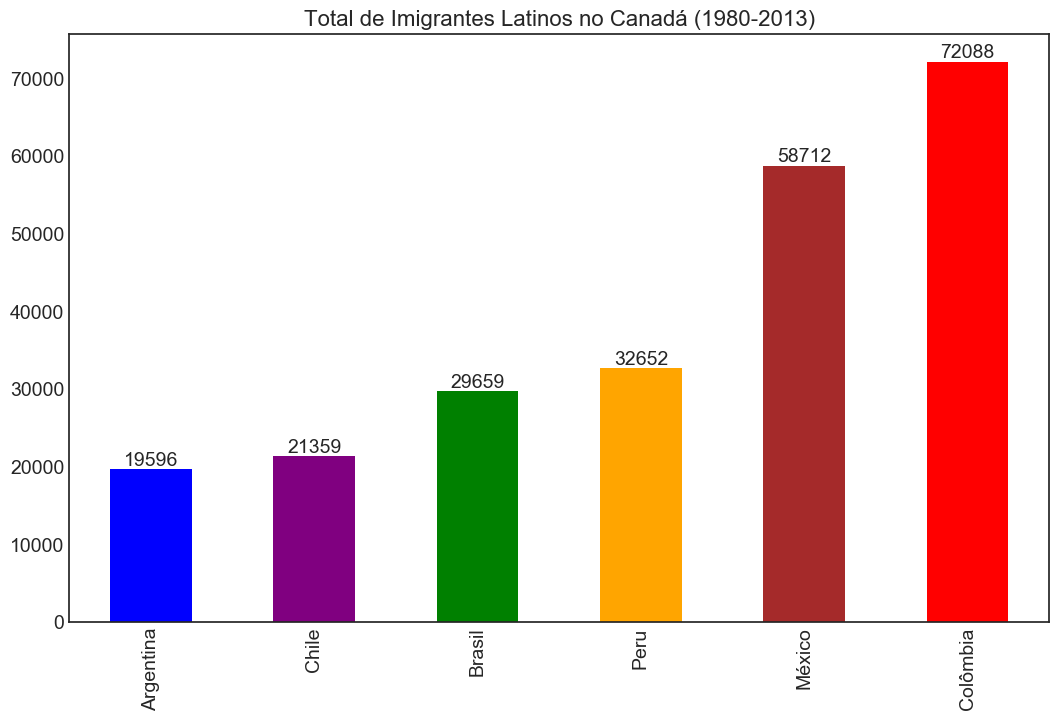

In [ ]:
# Gráfico de barras do total de imigrantes por país (1980-2013)
imigracao_total_paises = df_paises.sum().sort_values(ascending=True)
imigracao_total_paises
imigracao_total_paises.plot(kind='bar', color=[cores[pais] for pais in imigracao_total_paises.index],
                             title='Total de Imigrantes Latinos no Canadá (1980-2013)',
                             figsize=(10,6))
for index, value in enumerate(imigracao_total_paises):
    plt.text(index, value, str(value), ha='center', va='bottom')
    
plt.show()